In [1]:
import pickle
import os
import sys
sys.path.insert(0, "../02_gaus_proc")

import copy
from methods import get_trace_j

In [2]:
from plotting.my_plotly import my_plotly_plot


sys.path.insert(0, os.path.join(os.environ["PROJ_irox"], "data"))
from proj_data_irox import (
    bulk_dft_data_path,
    ids_to_discard__too_many_atoms_path,
    unique_ids_path,
    df_dij_path)

# my_plotly_plot?

# Script Inputs

In [3]:
stoich_i = "AB3"
custom_name = "regular"


# generations to plot
gen_0 = 0
gen_1 = 3
gen_2 = 8
gen_3 = 15
gen_4 = 24

# gen_0 = 0
# gen_1 = 3
# gen_2 = 9
# gen_3 = 18
# gen_4 = 32

gens_to_plot = [gen_0, gen_1, gen_2, gen_3, gen_4]

main_gen = gen_2

In [4]:
al_output_data_path = os.path.join(
    os.environ["PROJ_irox"],
    "workflow/ml_modelling", "00_ml_workflow/190611_new_workflow",
    "02_gaus_proc/out_data")
filename_i = "data_dict_" + stoich_i + "_" + custom_name + "_processed.pickle"

with open(os.path.join(al_output_data_path, filename_i), "rb") as fle:
    data = pickle.load(fle)

In [5]:
# #############################################################################
with open(bulk_dft_data_path, "rb") as fle:
    df_bulk_dft = pickle.load(fle)
    df_bulk_dft_orig = copy.deepcopy(df_bulk_dft)

    sources = ['raul', 'raul_oer']
    df_bulk_dft = df_bulk_dft[df_bulk_dft["source"].isin(sources)]

In [6]:
num_systems_0 = data[0]["model_processed"].shape[0]

In [7]:
traces_list = []
for gen_i in gens_to_plot:
    print(gen_i)

    model_i = data[gen_i]["model_processed"]
    trace_i = get_trace_j(
        model_i,
        # df_bulk_dft=df_bulk_dft,
        prediction_key="prediction_unstandardized",
        uncertainty_key="uncertainty_unstandardized",
        plot_dft_instead_of_pred=True,
        trace_all_dft=True,
        trace_horiz_lines=True,
        
        marker_size=6,
        )

    traces_list.append(trace_i)

0
3
8
15
24


In [8]:
%%capture

import plotly.graph_objects as go
from plotly.subplots import make_subplots

a = 1 / len(traces_list)
x = 0.1
y = a + x
z = a - x / 4

column_widths = [z, z, y, z, z]
# column_widths = 5 * [0.2]
print("column_widths:", column_widths)

fig = make_subplots(
    rows=1, cols=len(traces_list),
    column_widths=column_widths,
    shared_yaxes=True,
    # x_title="TMEP", y_title="TEMP",
    # vertical_spacing=,
    horizontal_spacing=0.01,
    )

for i_ind, traces_i in enumerate(traces_list):
    for trace_i in traces_i:
        fig.add_trace(trace_i, row=1, col=i_ind + 1)

fig.update_layout(
    dict(
        height=200,
        width=650,
        showlegend=False,
        font=go.layout.Font(
            color="black",
            family="Arial",
            # size=2,
            ),
        # xaxis={"range": [0, 1000]},
        margin=go.layout.Margin(
            b=20,
            l=20,
            r=10,
            t=10),
        # title_text="Subplots",

        # paper_bgcolor="white",
        # plot_bgcolor="white",
        paper_bgcolor="rgba(0,0,0,0)",
        plot_bgcolor="rgba(0,0,0,0)",
        )
    )

fig.update_xaxes(
    # title_text="xaxis 1 title",
    range=[-20, num_systems_0 + 10],
    showticklabels=False,

    mirror=True,
    ticks=None,
    linecolor="black",
    linewidth=1.,
    showline=True,
    showgrid=False,
    )

if stoich_i == "AB3":
    range_y = [-6.854, -4.300]
elif stoich_i == "AB2":
    range_y = None

fig.update_yaxes(
    range=range_y,
    mirror=True,
    ticks=None,

    linecolor="black",
    linewidth=1.,
    showline=True,
    showgrid=False,
    )

# #############################################################################
fig.update_xaxes(
    # title_text="xaxis 1 title",
    range=[-20, num_systems_0 + 10],
    showticklabels=False,

    mirror=True,
    ticks=None,
    linecolor="red",
    linewidth=1.,
    showline=True,
    row=1, col=3,
    )

fig.update_yaxes(
    mirror=True,
    ticks=None,

    linecolor="red",
    linewidth=1.,
    showline=True,
    row=1, col=3,
    )

# fig.update_xaxes(title_text="xaxis 1 title", row=1, col=1)
# fig.update_xaxes(title_text="xaxis 2 title", range=[10, 50], row=1, col=2)
# fig.update_xaxes(title_text="xaxis 3 title", showgrid=False, row=2, col=1)
# fig.update_xaxes(title_text="xaxis 4 title", type="log", row=2, col=2)

# fig.layout["annotations"][0]["font"]["size"] = 8 * (4/3)
# fig.layout["annotations"][1]["font"]["size"] = 8 * (4/3)

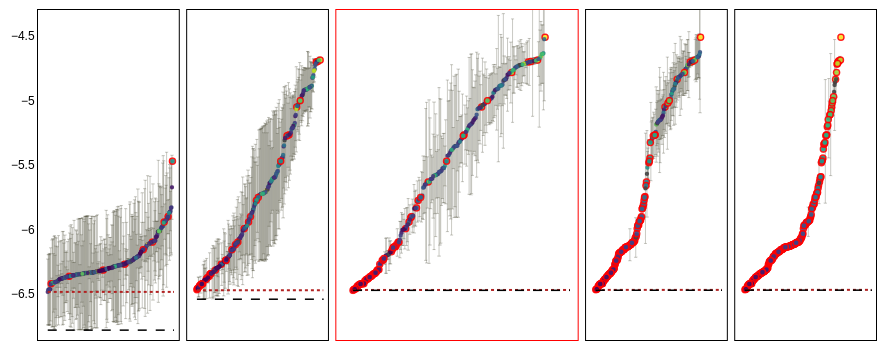

In [9]:
my_plotly_plot(
    figure=fig,
    # layout=None,
    # layout_override=None,
    plot_name="al_5_gens_in_row",
    save_dir="out_plot",
    data=None,
    write_pdf_svg=True,
    write_html=True,
    write_png=True,
    png_scale=10,
    write_pdf=True,
    # write_svg=False,
    # upload_plot=False,
    )

fig.show()

In [10]:
model_i = data[main_gen]["model_processed"]
trace_i = get_trace_j(
    model_i,
    df_bulk_dft=df_bulk_dft,
    prediction_key="prediction_unstandardized",
    uncertainty_key="uncertainty_unstandardized",
    plot_dft_instead_of_pred=True,
    trace_all_dft=True,
    trace_horiz_lines=True,
    )
trace_i = trace_i[0:1]
layout = go.Layout(
    width=450,
    height=270,
    xaxis=dict(
        range=[-10, num_systems_0 + 10],

        showticklabels=False,
        mirror=True,
        ticks=None,
        linecolor="red",
        linewidth=1.,
        showline=True,
        showgrid=False,
        ),

    yaxis=dict(
        # range=[-10, num_systems_0 + 10],

        showticklabels=False,
        mirror=True,
        ticks=None,
        linecolor="red",
        linewidth=1.,
        showline=True,
        showgrid=False,
        ),
    

    showlegend=False,
    font=go.layout.Font(
        color="black",
        family="Arial",
        # size=2,
        ),
    # xaxis={"range": [0, 1000]},
    margin=go.layout.Margin(
        b=20,
        l=20,
        r=10,
        t=10),
    # title_text="Subplots",

    # paper_bgcolor="white",
    # plot_bgcolor="white",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    )

fig = go.Figure(data=trace_i, layout=layout)

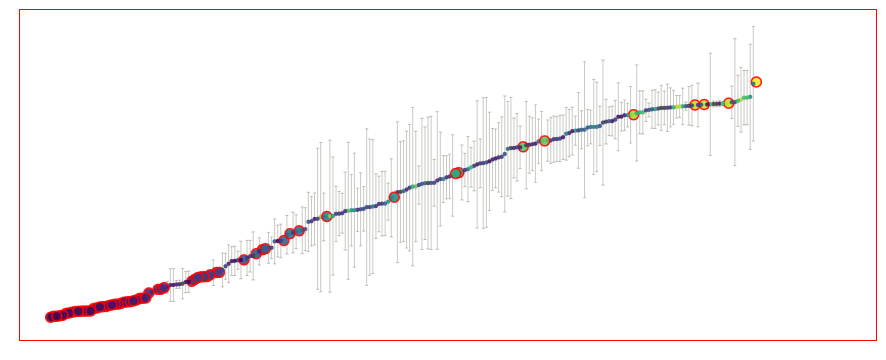

In [11]:
my_plotly_plot(
    figure=fig,

    # layout=None,
    # layout_override=None,

    plot_name="al_main_plot",
    save_dir="out_plot",
    data=None,
    write_pdf_svg=True,
    write_html=True,
    write_png=True,
    png_scale=10,
    write_pdf=True,

    # write_svg=False,
    # upload_plot=False,
    )

fig.show()

# Zoomed-in Plot

In [12]:
model_i = data[main_gen]["model_processed"]
trace_i = get_trace_j(
    model_i,
    df_bulk_dft=df_bulk_dft,
    prediction_key="prediction_unstandardized",
    uncertainty_key="uncertainty_unstandardized",
    plot_dft_instead_of_pred=True,
    trace_all_dft=True,
    trace_horiz_lines=True,
    marker_size=14,
    )
trace_i = trace_i[0:1]

layout = go.Layout(
    width=450 / 2,
    height=270 / 2,

    showlegend=False,
    font=go.layout.Font(
        color="black",
        family="Arial",
        # size=2,
        ),
    # xaxis={"range": [0, 1000]},
    margin=go.layout.Margin(
        b=20,
        l=20,
        r=10,
        t=10),
    # title_text="Subplots",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(
        showticklabels=False,
        mirror=True,
        ticks=None,
        linecolor="black",
        linewidth=1.,
        showline=True,
        showgrid=False,        
        ),

    yaxis=dict(
        showticklabels=False,
        mirror=True,
        ticks=None,
        linecolor="black",
        linewidth=1.,
        showline=True,
        showgrid=False,        
        ),

    )

fig = go.Figure(data=trace_i, layout=layout)

In [13]:
fig.layout.xaxis["range"] = [-1, 12]
fig.layout.yaxis["range"] = [-6.4772, -6.41]

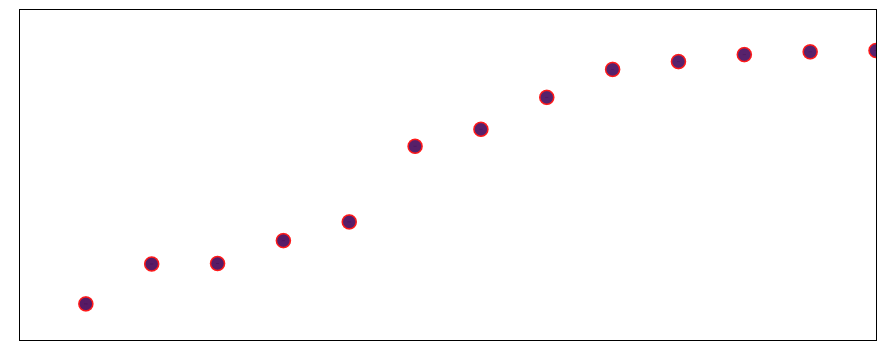

In [14]:
my_plotly_plot(
    figure=fig,

    # layout=None,
    # layout_override=None,

    plot_name="al_main_plot_zoomed",
    save_dir="out_plot",
    data=None,
    write_pdf_svg=True,
    write_html=True,
    write_png=True,
    png_scale=10,
    write_pdf=True,

    # write_svg=False,
    # upload_plot=False,
    )

fig.show()